### 박스 그래프
- 컬럼/변수의 이상치 데이터 및 데이터 분포 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
# 데이터 준비
file_path = '../data/auto_mpg.csv'
font_path = r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\font\NanumMyeongjo.ttf'

In [3]:
# 미리 지정하고 넘어가는 폰트

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [4]:
# 데이터 프레임
data_df = pd.read_csv(file_path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# - 컬럼별 타입 확인
data_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
# 컬럼별로 이산한 값 즉, 이상치 체크 및 시각화
data_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


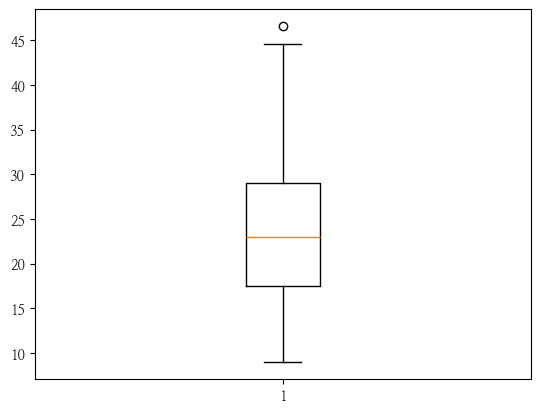

In [10]:
# - 박스 그래프로 시각화
ret_dict = plt.boxplot(data_df['mpg'])
plt.show()

In [16]:
# 박스 그래프에서 받은 결과 확인
for k,v in ret_dict.items():
    print()
    print(k, v)
    
    for _ in v:
        print(_.get_data()) # 결과보는 방법
        # cap : 바깥 선
        # boxes : 박스
        # medians : 중심?
        # fliers ; 이상치
        # 이상치도 바꿀 수 있음.
        


whiskers [<matplotlib.lines.Line2D object at 0x000001B3B701C590>, <matplotlib.lines.Line2D object at 0x000001B3B701CED0>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))

caps [<matplotlib.lines.Line2D object at 0x000001B3B6FFBFD0>, <matplotlib.lines.Line2D object at 0x000001B3B701E150>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))

boxes [<matplotlib.lines.Line2D object at 0x000001B3B700BD10>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))

medians [<matplotlib.lines.Line2D object at 0x000001B3B701EA50>]
(array([0.925, 1.075]), array([23., 23.]))

fliers [<matplotlib.lines.Line2D object at 0x000001B3B701F390>]
(array([1.]), array([46.6]))

means []


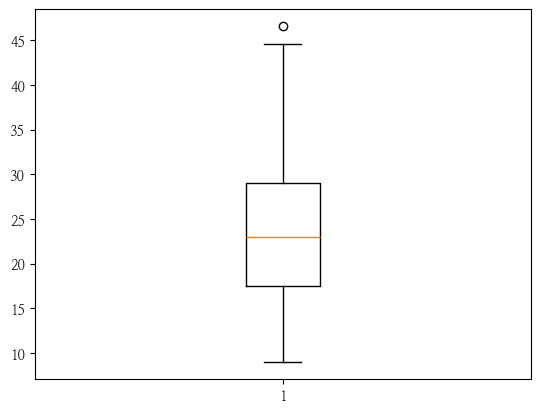

In [26]:
# 그래프 눞히기
# ret_dict = plt.boxplot(data_df['mpg'])

# 이상치 조절
ret_dict = plt.boxplot(data_df['mpg'], whis=1.5)
plt.show()

In [27]:
outliers = ret_dict['caps']
outliers[0].get_data()[1].tolist(), outliers[1].get_data()[1].tolist()

([9.0, 9.0], [44.6, 44.6])

In [28]:
# 하위 상위 이상치 값 추출

outliers = ret_dict['caps']
low_outlier = outliers[0].get_data()[1].tolist()[0]
up_outlier = outliers[1].get_data()[1].tolist()[0]
low_outlier, up_outlier

(9.0, 44.6)

In [30]:
# 이상치 처리
data_df[data_df['mpg'] < low_outlier]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [31]:
data_df[data_df['mpg'] > up_outlier] # 하위 값으로 채우던가 버리던가 그건 본인의 선택. 둘다 해보고 결정

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
